<a href="https://colab.research.google.com/github/ramiro-l/ModelosYSimulacionFAMAF/blob/main/Pr%C3%A1ctico4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRÁCTICO 4

## Ejercicio 1

Se baraja un conjunto de n = 100 cartas (numeradas consecutivamente del 1 al 100) y se extrae del mazo una carta por vez. Consideramos que ocurre un “éxito” si la i-ésima carta extraída es aquella cuyo número es i (i = 1,...,n).

Use el archivo “Problemas de coincidencias” para guiarse.



## a) 👷👷
Calcule la probabilidad de que
- (i) las primeras r cartas sean coincidencias y dé su valor para r = 10.
- (ii) haya exactamente r coincidencias y estén en las primeras r cartas. Dé su valor para r = 10.


## b) 👷👷
Pruebe que E(X) = Var(X) = 1 donde X es el número de coincidencias obtenidas en una baraja de n
cartas.

## c) Programa que simula
Escriba un programa de simulación para estimar la esperanza y la varianza del número total de éxitos, y de los eventos del inciso (a) con r = 10, y compare los resultados obtenidos con 100, 1000, 10000 y 100000 iteraciones.


In [52]:
from random import random

def permutacion(a): #a=[a[0],a[1],...,a[N-1]]
  """
  Permutacion del arreglo. Como funciona?

  Supongamos a = [ a[0],a[1],a[2],a[3],a[4],a[5],a[6],a[8],a[9] ]

  1) Generamos un indice "i" entre [0,1,2,3,4,5,6,7,8,9]
  2) Intercambiamos a[i] con a[9]
  3) Generamos un indice "i" entre [0,1,2,3,4,5,6,7,8,]
  4) Intercambiamos a[j] con a[8]
  ...
  15) Generamos un indice "i" entre [0,1,2]
  16) Intercambiamos a[p] con a[2]
  17) Generamos un indice "i" entre [0,1]
  18) Intercambiamos a[i] con a[1]
  Finalemte retornamos a

  Notar que el ultimo indice del intervalo que genera el indice
  es aquel por el que vamos a intercambiar.
  """

  N = len(a)
  for j in range(N-1,0,-1):
    indice = int((j+1) * random())
    a[j], a[indice] = a[indice], a[j]
  return a

In [53]:
numero_cartas = 100
baraja_ordenada = [i+1 for i in range(numero_cartas)]

def va_X():
  baraja_permutada = permutacion(baraja_ordenada)
  exitos = [baraja_permutada[i] == i+1 for i in range(numero_cartas)]
  return exitos

def estadisticas(N, r):
  contador_esperanza = 0

  contador_primeras_coincidencias = 0
  contador_exactamente_primeras_coincidencias = 0
  for _ in range(N):
    exitos = va_X()
    contador_esperanza += sum(exitos)
    primeros_r_exitos = sum(exitos[i] for i in range(r)) == r
    resto_fracasos = sum(exitos[i] for i in range(r, numero_cartas)) == 0
    if primeros_r_exitos:
      contador_primeras_coincidencias += 1
    if primeros_r_exitos and resto_fracasos:
      contador_exactamente_primeras_coincidencias += 1

  contador_varianza = 0
  for _ in range(N):
    exitos = va_X()
    contador_varianza += (sum(exitos) - contador_esperanza/N) ** 2

  print(f"--------------  N={n}  --------------")
  print(f"  Esperanza de X({n}): ", contador_esperanza/N)
  print(f"  Varianza de X({n}): ", contador_varianza/N)
  print(f"  Probabilidad de {r} primeras coincidencias({n}): ", contador_primeras_coincidencias/N)
  print(f"  Probabilidad de exactamente {r} primeras coincidencias({n}): ", contador_exactamente_primeras_coincidencias/N)
  print("--------------------------------------")

In [3]:
for n in [100, 1_000, 10_000 , 100_000]:
  estadisticas(n, 10)

--------------  N=100  --------------
  Esperanza de X(100):  0.98
  Varianza de X(100):  1.4228000000000005
  Probabilidad de 10 primeras coincidencias(100):  0.0
  Probabilidad de exactamente 10 primeras coincidencias(100):  0.0
--------------------------------------
--------------  N=1000  --------------
  Esperanza de X(1000):  0.984
  Varianza de X(1000):  1.0116080000000012
  Probabilidad de 10 primeras coincidencias(1000):  0.0
  Probabilidad de exactamente 10 primeras coincidencias(1000):  0.0
--------------------------------------
--------------  N=10000  --------------
  Esperanza de X(10000):  0.999
  Varianza de X(10000):  1.019821400000052
  Probabilidad de 10 primeras coincidencias(10000):  0.0
  Probabilidad de exactamente 10 primeras coincidencias(10000):  0.0
--------------------------------------
--------------  N=100000  --------------
  Esperanza de X(100000):  1.00201
  Varianza de X(100000):  0.997627416900357
  Probabilidad de 10 primeras coincidencias(100000):  

## Ejercicio 2

Se desea construir una aproximación de
$
θ = \sum_{k=1}^{N} e^{(\frac{K}{N})}
$
con $N=10000$ es decir
$
θ =\sum_{k=1}^{10000} e^{(\frac{K}{10000})}
$

### a) Algoritmo para estimar

Escriba un algoritmo para estimar la cantidad deseada.

Recordar que la **esperanza** de una v.a $X$ es $E[X] = \sum_i x_i P(X = x_i)$ y ademas $E[g(X)] = \sum_i g(x_i) p(x_i)$ con $g : R → R$.

Por lo tanto podemos tomar una v.a $X \thicksim U(1, N)$ por lo tanto su funcion de probabilida de masa es  $p(x) = \frac{1}{N}$. Ahora si tomamos
$$
g(x) = e^{(\frac{x}{N})}
$$
ahora si con $x_i = i$
$$
  E[g(X)] = \sum_{k=1}^{N} g(x_i) p(x_i) = \sum_{k=1}^{N} g(k) p(k) = \sum_{k=1}^{N} e^{(\frac{k}{N})} \frac{1}{N} = \frac{1}{N} \sum_{k=1}^{N} e^{(\frac{k}{N})}
$$
entonces tenemos que
$$
θ ={N}\ E[g(X)]
$$

Y ahora sobre esto es más facil aplicar **Monte Carlo** para estimar $θ$. El cual nos dice que si generamos $X_1,...,X_n \thicksim U(1, N)$ y $X_1 = x_1,...,X_n = x_n $ con un $n$ suficientemente grande. Podemos estimar
$$
E[g(X)]  = \frac{g(x_1)+ ... + g(x_n)}{N}
$$
entonces
$$
θ ={N}\ E[g(X)] = {N}\  \frac{g(x_1)+ ... + g(x_n)}{n}
$$



In [54]:
import time
import numpy as np
from random import random

N = 10_000

def g(x):
    return np.exp(x/N)

def estimacion_de_theta(Nsim):
  res = 0
  inicio = time.time()
  for _ in range(Nsim):
    x_i = int(random()*N + 1)
    res += g(x_i)
  res = (res/Nsim) * N
  fin = time.time()
  return res, fin-inicio

### b) Aproximación con 100 números

Obtenga la aproximación sorteando 100 números aleatorios.

In [55]:
print(f"Estimacion con 100 numeros aletorios: ", estimacion_de_theta(Nsim=100))

Estimacion con 100 numeros aletorios:  (np.float64(16933.327552656054), 0.00020432472229003906)


### c) Calcular la suma de los primeros 100 términos

Escriba un algoritmo para calcular la suma de los primeros 100 términos, y compare el valor exacto
con las dos aproximaciones, y el tiempo de cálculo.

In [6]:
def exactamente_theta(Nterminos):
  inicio = time.time()
  res = 0
  for i in range(1,Nterminos+1):
    res += g(i)
  fin = time.time()
  return res, fin-inicio

In [7]:
print(f"Valor exacto de los primeos 100 numeros: ", exactamente_theta(Nterminos=100))

Valor exacto de los primeos 100 numeros:  (np.float64(100.50669600897406), 0.00043582916259765625)


In [8]:
import pandas as pd

experimentos = [
    (estimacion_de_theta, 100), # Nsim
    (exactamente_theta, 10_000), # Nterminos
    (exactamente_theta, 100) # Nterminos
]

data = []
for func, arg in experimentos:
    valor, tiempo = func(arg)
    data.append({
        'Funcion': func.__name__ + f'({arg})',
        'Valor': valor,
        'Tiempo': tiempo
    })

pd.DataFrame(data)

,Funcion,Valor,Tiempo
0,estimacion_de_theta(100),18129.006653,0.000312
1,exactamente_theta(10000),17183.677440,0.031752
2,exactamente_theta(100),100.506696,0.000246


#### Conclucion

Notar que con solo 100 simulaciones nos aproximamos mucho al valor real de theta.

Y ademas tardamos casi lo mismo que calcular los primeros 100 terminos.

Por ello conviene calcular una estimacion.

## Ejercicio 3

Se lanzan simultáneamente un par de dados legales y se anota el resultado de la suma de ambos.
El proceso se repite hasta que todos los resultados posibles: 2,3,...,12 hayan aparecido al menos una vez.
Estudiar mediante una simulación la variable N, el número de lanzamientos necesarios para cumplir el
proceso. Cada lanzamiento implica arrojar el par de dados.

### a) Descripción del algoritmo

Describa la estructura lógica del algoritmo que permite simular en computadora el número de lanzamientos necesarios para cumplir el proceso.


Tenemos que primero de alguna forma simular tirar un dado, luego vamos q tener una especie de planilla y vamos a tirar dos dados, sumarlos y marcar en la planilla el resulatado como que ya salio. Repetimos esto hasta que se llene la planilla.

### b) Código
Mediante una implementación en computadora,

- **(i)** Estime el valor medio y la desviación estándar del número de lanzamientos, repitiendo el algoritmo: 100, 1000, 10000 y 100000 veces.

- **(ii)** Estime la probabilidad de que N sea por lo menos 15 y la probabilidad de que N sea a lo sumo
9, repitiendo el algoritmo: 100, 1000, 10000 y 100000

#### Simulacion

In [9]:
from random import random

def tirar_dado():
  return int(random()*6 + 1)

def simular_lanzamientos():
  vistos = set()
  lanzamientos = 0

  while len(vistos) < 11:
    suma = tirar_dado() + tirar_dado()
    vistos.add(suma)
    lanzamientos += 1

  return lanzamientos

In [10]:
simular_lanzamientos()

42

#### Estimaciones de **i) ii)**

Recordar que dado $n$ cantidad de muestas y $x_1,\dots,x_n$ valores,  tengo que:

$$
Media: \ \ \ \  μ = \frac{1}{n}∑_{i=1}^n x_i
$$

$$
Desvio\ Estandar: \ \ \ \  σ = \sqrt{\frac{1}{n-1}∑_{i=1}^N (x_i- μ)^2}
$$

In [11]:
import math

N_REPETICIONES = [100, 1_000, 10_000, 100_000]

def estadisticas(N):
  resultados = [simular_lanzamientos() for _ in range(N)]

  # Calcular media
  suma_total = sum(resultados)
  media = suma_total / N

  # Calcular desvío estándar
  suma_cuadrados = sum((x - media) ** 2 for x in resultados)
  desvio = math.sqrt(suma_cuadrados / (N - 1))

  # Probabilidad N sea por lo menos 15
  prob_N_15 = sum(1 for x in resultados if x >= 15) / N

  # Probabilidad de que N sea a lo sumo 9
  prob_N_9 = sum(1 for x in resultados if x <= 9) / N

  return media, desvio, prob_N_15, prob_N_9


for n in N_REPETICIONES:
  print("----------------")
  print(f"N={n}")
  media, desvio, prob_N_15, prob_N_9  = estadisticas(n)
  print(f"Media: {media:.6f}")
  print(f"Desvio: {desvio:.6f}")
  print(f"Probabilidad de N >= 15: {prob_N_15:.6f}")
  print(f"Probabilidad de N <= 9: {prob_N_9:.6f}")
  print("----------------")

----------------
N=100
Media: 59.150000
Desvio: 35.610512
Probabilidad de N >= 15: 1.000000
Probabilidad de N <= 9: 0.000000
----------------
----------------
N=1000
Media: 60.648000
Desvio: 34.524891
Probabilidad de N >= 15: 0.999000
Probabilidad de N <= 9: 0.000000
----------------
----------------
N=10000
Media: 61.009800
Desvio: 35.878523
Probabilidad de N >= 15: 0.999000
Probabilidad de N <= 9: 0.000000
----------------
----------------
N=100000
Media: 61.177620
Desvio: 36.093394
Probabilidad de N >= 15: 0.998770
Probabilidad de N <= 9: 0.000000
----------------


## Ejercicio 4

Implemente cuatro métodos para generar una variable $X$ que toma los valores del $1\ al\ 10$, con probabilidades

- $p_1 = 0,11$
- $p_2 = 0,14$
- $p_3 = 0,09$
- $p_4 = 0,08$
- $p_5 = 0,12$
- $p_6 = 0,10$
- $p_7 = 0,09$
- $p_8 = 0,07$
- $p_9 = 0,11$
- $p_{10} = 0,09$

usando:

### Codigo auxiliar

In [12]:
VALORES = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
PROBABILIDADES = [0.11, 0.14, 0.09, 0.08, 0.12, 0.10, 0.09, 0.07, 0.11, 0.09]

##### Verificacion auxiliar para revisar los metodos

In [56]:
def verificar_metodo(metodo, N=1_000_000):
    results = [0 for _ in range(len(VALORES))]

    for _ in range(N):
        results[metodo() - 1] += 1

    print(f"{'Índice':>6} | {'Esperado':>9} | {'Obtenido':>9} | {'Diferencia':>10}")
    print("-" * 42)

    for i in range(10):
        obtenido = results[i] / N
        esperado = PROBABILIDADES[i]
        diferencia = abs(obtenido - esperado)
        print(f"{i+1:>6} | {esperado:>9.3f} | {obtenido:>9.3f} | {diferencia:>10.3f}")

### a) Aceptación o rechazo

Método de rechazo con una uniforme discreta, buscando la cota c más baja posible

#### Parte teorica

> Debemos una v.a uniforme discreta $Y \backsim U(1,n)$ con $n \in N$ tal que
>
> $$
Si P(X = x_j ) > 0,\ entonces\ P(Y = x_j ) > 0,\ para\ todo\ x_j\ en\ el\ rango\ de\ X
$$

> es decir que $n ≥ 10$ porque $X$ toma valores del $1\ al\ 10$.

> Ademas tenemos que minimizar una cota $c$ cumpliendo esta condición:

> $$
\frac{P(X = x_i)}{P(Y = y_i)} ≤ c
$$


> Notemos que $P(Y = y_i) = \frac{1}{n}$ por lo tanto tendriamos que:

> $$
\frac{P(X = x_i)}{P(Y = y_i)} = \frac{P(X = x_i)}{\frac{1}{n}}  = P(X = x_i)n
$$

> Y ahora si la ecuacion a minimizar es

> $$
P(X = x_i)n ≤ c
$$

> Como $P(X = x_i)$ toma valores en el intervalo $[0,1]$ con dar el $n$ mas chico posible alcanza para minimizar el $c$ y en este caso usaremos $n = 10$.

> Notar que para despejar c tenemos que encontrar el maximo valor
de $P(X = x_i)$, en este caso tenemos que es $P(X = x_2) = 0.14$ por lo tanto  $c = n * P(X = x_2) = 10 * 0.14 = 1.4$ e $Y \backsim U(1,10)$

In [14]:
cant_valores_uninforme = len(VALORES)

cota_c = round(max(PROBABILIDADES) * cant_valores_uninforme, 6)

print(f"Cantidad de valores de la uniforme auxiliar: {cant_valores_uninforme}")
print(f"Menor cota c: {cota_c}")


Cantidad de valores de la uniforme auxiliar: 10
Menor cota c: 1.4


#### Código

In [15]:
from random import random

# Metodo generalizado - Funcion generadora
def generadora_aceptacion_rechazo(va_Y, prob_X, prob_Y, c):
  """
  Funcion generadora de una aceptacion rechazo.


  `va_y`: variable aleatoria, () -> numero
  `prob_X`: funcion de probailida de masas de X, (numero) -> probabilidad
  `prob_Y`: funcion de probailida de masas de Y, (numero) -> probabilidad
  `c`: cota de aceptacion

  Retorna una funcion. La cual es la variabla aleatoria.

  ---

  Ejemplo:
  ```
  probabilidades= [0.1, 0.2, 0.5, 0.2]
  va_Y = lambda: int(random()*4 + 1)
  prob_X= lambda x: probabilidades[x-1]
  prob_Y = lambda x: 1/4
  c = 2
  ```
  """

  def variable_aleatoria():
    while True:
      y = va_Y()
      u = random()
      if u <= prob_X(y) / (c * prob_Y(y)):
       return y

  return variable_aleatoria

In [16]:
va_Y = lambda: int(random()*10 + 1)
prob_X= lambda x: PROBABILIDADES[x-1]
prob_Y = lambda x: 1/10
c = 1.4

metodo_aceptacion_rechazo_X = generadora_aceptacion_rechazo(va_Y, prob_X, prob_Y, c)

metodo_aceptacion_rechazo_X()

10

#### Verificación

In [17]:
# Codigo auxiliar para revisar que este bien echa la simulacion
verificar_metodo(metodo_aceptacion_rechazo_X)

Índice |  Esperado |  Obtenido | Diferencia
------------------------------------------
     1 |     0.110 |     0.110 |      0.000
     2 |     0.140 |     0.140 |      0.000
     3 |     0.090 |     0.090 |      0.000
     4 |     0.080 |     0.080 |      0.000
     5 |     0.120 |     0.120 |      0.000
     6 |     0.100 |     0.100 |      0.000
     7 |     0.090 |     0.090 |      0.000
     8 |     0.070 |     0.070 |      0.000
     9 |     0.110 |     0.110 |      0.000
    10 |     0.090 |     0.090 |      0.000


### b) Aceptación o rechazo con c = 3
Método de rechazo con una uniforme discreta, usando c = 3.

#### Código

Reutilizamos lo anterior cambiando c por 3.

In [18]:
va_Y = lambda: int(random()*10 + 1)
prob_X= lambda x: PROBABILIDADES[x-1]
prob_Y = lambda x: 1/10
c = 3

metodo_aceptacion_rechazo_X_c3 = generadora_aceptacion_rechazo(va_Y, prob_X, prob_Y, c)

metodo_aceptacion_rechazo_X_c3()

2

#### Verificación

In [19]:
# Codigo auxiliar para revisar que este bien echa la simulacion
verificar_metodo(metodo_aceptacion_rechazo_X_c3)

Índice |  Esperado |  Obtenido | Diferencia
------------------------------------------
     1 |     0.110 |     0.110 |      0.000
     2 |     0.140 |     0.141 |      0.001
     3 |     0.090 |     0.090 |      0.000
     4 |     0.080 |     0.080 |      0.000
     5 |     0.120 |     0.120 |      0.000
     6 |     0.100 |     0.100 |      0.000
     7 |     0.090 |     0.090 |      0.000
     8 |     0.070 |     0.071 |      0.001
     9 |     0.110 |     0.109 |      0.001
    10 |     0.090 |     0.090 |      0.000


### c) Transformada inversa


In [20]:
from random import random

# Metodo generalizado - Funcion generadora
def generadora_transformada_inversa(p, x):
  """
  Funcion generadora de una transformada inversa.

  `p`: lista de probabilidades
  `x`: lista de valores

  Retorna una funcion. La cual es la variabla aleatoria.

  ---

  Ejemplo:
  ```
  p = [0.1, 0.2, 0.3, 0.4]
  x = [1, 2, 3, 4]
  ```
  """

  if len(p) != len(x):
    raise ValueError("p y x deben tener la misma longitud")

  def variable_aleatoria():
    U = random()
    i, F = 0, p[0]
    while U >= F:
      i +=1; F += p[i]
    return x[i]

  return variable_aleatoria

In [21]:
metodo_transformada_inversa_X = generadora_transformada_inversa(PROBABILIDADES, [i+1 for i in range(10)])

metodo_transformada_inversa_X()

9

#### Verificación

In [22]:
verificar_metodo(metodo_transformada_inversa_X)

Índice |  Esperado |  Obtenido | Diferencia
------------------------------------------
     1 |     0.110 |     0.110 |      0.000
     2 |     0.140 |     0.139 |      0.001
     3 |     0.090 |     0.090 |      0.000
     4 |     0.080 |     0.080 |      0.000
     5 |     0.120 |     0.120 |      0.000
     6 |     0.100 |     0.100 |      0.000
     7 |     0.090 |     0.091 |      0.001
     8 |     0.070 |     0.070 |      0.000
     9 |     0.110 |     0.110 |      0.000
    10 |     0.090 |     0.090 |      0.000


### d) Método de la urna

Método de la urna: utilizar un arreglo A de tamaño 100 donde cada valor i está en exactamente $p_i * 100$
posiciones.

El método debe devolver A[k] con probabilidad 0,01.

¿Por qué funciona?

#### Código

In [23]:
from random import random

# Metodo generalizado - Funcion generadora
def generadora_urna(p,x):
  """
  Funcion generadora de una urna.

  `p`: lista de probabilidades
  `x`: lista de valores

  Retorna una funcion. La cual es la variabla aleatoria.

  ---

  Ejemplo:
  ```
  p = [0.1, 0.2, 0.3, 0.4]
  x = [1, 2, 3, 4]
  ```
  """

  if len(p) != len(x):
    raise ValueError("p y x deben tener la misma longitud")

  A = []
  for i in range(len(p)):
    for j in range(int(p[i]*100)):
      A.append(x[i])

  def variable_aleatoria():
    return A[int(random()*100)]

  return variable_aleatoria


In [24]:
probabilidades = [0.11, 0.14, 0.09, 0.08, 0.12, 0.10, 0.09, 0.07, 0.11, 0.09]

metodo_urna_X = generadora_urna(probabilidades, [i+1 for i in range(10)])

metodo_urna_X()

7

#### Verificación

In [25]:
verificar_metodo(metodo_urna_X)

Índice |  Esperado |  Obtenido | Diferencia
------------------------------------------
     1 |     0.110 |     0.110 |      0.000
     2 |     0.140 |     0.140 |      0.000
     3 |     0.090 |     0.090 |      0.000
     4 |     0.080 |     0.080 |      0.000
     5 |     0.120 |     0.120 |      0.000
     6 |     0.100 |     0.100 |      0.000
     7 |     0.090 |     0.090 |      0.000
     8 |     0.070 |     0.070 |      0.000
     9 |     0.110 |     0.110 |      0.000
    10 |     0.090 |     0.090 |      0.000


#### Parte teorica | ¿Porque funciona?

Esto funciona porque generamos un arreglo de 100 elementos tal que lo llenamos de la siguiente forma.


Como tenemos que nuesta va toma valores del 1 al 10  con $p_1, …, p_{10}$ las probabilidades de que salgan. El arreglo tiene en las primeras posiciones $p_1*100$ posiciones el $1$, luego en las $p_2*100$ posiciones el $2$ y asi sucecisibamente. Para ser precisos l arreglo queda de las siguiente manera:
- $p_1*100 = 11$
- $p_2*100 = 14$
- $p_3*100 = 9$
- $p_4*100 = 8$
- $p_5*100 = 12$
- $p_6*100 = 10$
- $p_7*100 = 9$
- $p_8*100 = 7$
- $p_9*100 = 11$
- $p_{10}*100 = 9$

$$
[0,0,0,0,0,0,0,0,0,0,0,
1,1,1,1,1,1,1,1,1,1,1,1,1,1,
2,2,2,2,2,2,2,2,2,
3,3,3,3,3,3,3,3,
4,4,4,4,4,4,4,4,4,4,4,4,
5,5,5,5,5,5,5,5,5,5,
6,6,6,6,6,6,6,6,6,
7,7,7,7,7,7,7,
8,8,8,8,8,8,8,8,8,8,8,
9,9,9,9,9,9,9,9,9]
$$

Claramente tenemos que $P(X = A[K]) = 0,01$ con $k\in\{0,\dots,99\}$ y justamente por esto se da:

$$
P(X = 1) = P(X = A[0]) + \dots + P(X = A[10]) = 11*0.01 = 0.11 = p_1
$$

de manera similar para cualquier $x_1 \in \{1,\dots,10\}$

### Comparacion de eficiencia

Compare la eficiencia de los tres algoritmos realizando 10000 simulaciones

In [26]:
from time import time

def tiempo_metodo(metodo, N=10_000):
    empieza = time()
    for _ in range(N):
        metodo()
    termina = time()
    return termina - empieza

metodos = [
    ("Aceptación-Rechazo (X)", metodo_aceptacion_rechazo_X),
    ("Aceptación-Rechazo (X, c=3)", metodo_aceptacion_rechazo_X_c3),
    ("Transformada Inversa (X)", metodo_transformada_inversa_X),
    ("Método de la Urna (X)", metodo_urna_X),
]

resultados = [(nombre, tiempo_metodo(f)) for nombre, f in metodos]
for nombre, t in sorted(resultados, key=lambda x: x[1]):
    print(f"{nombre:<30} → {t:.4f}s")

Método de la Urna (X)          → 0.0020s
Transformada Inversa (X)       → 0.0036s
Aceptación-Rechazo (X)         → 0.0074s
Aceptación-Rechazo (X, c=3)    → 0.0132s


## Ejercicio 5

Implemente dos métodos para generar una binomial $Bin(n, p)$:
- I) Usando transformada inversa.
- II) Simulando n ensayos con probabilidad de éxito p y contando el número de éxitos.

Para ambos métodos:
- a) Compare la eficiencia de ambos algoritmos para n = 10 y p = 0,3, evaluando el tiempo necesario para realizar 10000 simulaciones.
- b) Estime el valor con mayor ocurrencia y la proporción de veces que se obtuvieron los valores 0 y 10 respectivamente.
- c) Compare estos valores con las probabilidades teóricas de la binomial. Si están alejados, revise el código.

### I) Usando transformada inversa.

In [27]:
from random import random

def bin_transformada_inversa(n,p):
  c = p / (1 - p)
  prob = (1 - p) ** n
  F = prob; i=0
  U = random()
  while U >= F:
    prob *= c * (n-i) / (i+1)
    F += prob
    i += 1
  return i

bin_transformada_inversa(10, 0.3)

2

### II) Simulando n ensayos con probabilidad de éxito p y contando el número de éxitos.

In [28]:
from random import random

def bin_simulacion(n,p):
  contador = 0
  for _ in range(n):
    if random() < p:
      contador += 1
  return contador

bin_simulacion(10, 0.3)

4

### a) Comparacion de eficiencia

Compare la eficiencia de ambos algoritmos para `n = 10` y `p = 0,3`, evaluando el tiempo necesario para realizar `10000 simulaciones`.

In [29]:
from time import time

def tiempo_metodo_binomial(metodo, n, p, N=10_000):
    empieza = time()
    for _ in range(N):
        metodo(n, p)
    termina = time()
    return termina - empieza

n = 10
p = 0.3

resultados_binomial = [
    ("Transformada Inversa", tiempo_metodo_binomial(bin_transformada_inversa, n, p)),
    ("Simulación", tiempo_metodo_binomial(bin_simulacion, n, p)),
]

print(f"{'Metodo':<24} | Tiempo")
print("-" * 35)
for nombre, t in sorted(resultados_binomial, key=lambda x: x[1]):
    print(f"{nombre:<24} | {t:.4f}s")


Metodo                   | Tiempo
-----------------------------------
Transformada Inversa     | 0.0068s
Simulación               | 0.0085s


### b) Estimaciones

Estime el valor con mayor ocurrencia y la proporción de veces que se obtuvieron los valores 0 y 10 respectivamente.

In [30]:
def valor_con_mayor_ocurrencia(metodo, n, p, N=10_000):
    valores = [0 for _ in range(n+1)]

    for _ in range(N):
        valor = metodo(n, p)
        valores[valor] += 1

    return valores.index(max(valores))

In [31]:
n = 10
p = 0.3

resultados_binomial = [
    ("Transformada Inversa", valor_con_mayor_ocurrencia(bin_transformada_inversa, n, p)),
    ("Simulación", valor_con_mayor_ocurrencia(bin_simulacion, n, p)),
]

print(f"{'Metodo':<24} | Valor con mayor ocurrencia")
print("-" * 55)
for nombre, v in resultados_binomial:
    print(f"{nombre:<24} | {v:>12}")

Metodo                   | Valor con mayor ocurrencia
-------------------------------------------------------
Transformada Inversa     |            3
Simulación               |            3


In [32]:
def probabilidad_que_sea(numero, metodo, n, p, N=10_000):
    contador = 0

    for _ in range(N):
      if numero == metodo(n, p):
        contador += 1

    return contador / N

In [33]:
n = 10
p = 0.3

resultados_binomial = [
    (
        "Transformada Inversa",
        probabilidad_que_sea(0,bin_transformada_inversa, n, p),
        probabilidad_que_sea(10,bin_transformada_inversa, n, p)
    ),
    (
        "Simulación",
        probabilidad_que_sea(0,bin_simulacion, n, p),
        probabilidad_que_sea(100,bin_simulacion, n, p)
    )
]

print(f"{'Método':<24} | {'P(X = 0)':>10} | {'P(X = 10)':>10}")
print("-" * 50)
for nombre, v1, v2 in resultados_binomial:
    print(f"{nombre:<24} | {v1:10.8f} | {v2:10.8f}")

Método                   |   P(X = 0) |  P(X = 10)
--------------------------------------------------
Transformada Inversa     | 0.03150000 | 0.00000000
Simulación               | 0.02500000 | 0.00000000


### c) Comparacion valores teoricos 🤔🤔

Compare estos valores con las probabilidades teóricas de la binomial. Si están alejados, revise el código.

Recordar que para $X$ binomial de parametros $p, n$ tenemos que:

$$
 p(i) = P(X = i) = \binom{n}{i} p^i (1 - p)^{n - i}\\
 E[X] = n*p
$$


In [34]:
import math

def bin_prob_teorica(k, n, p):
  return math.comb(n, k) * (p**k) * ((1-p)**(n-k))

def bin_esperanza_teorica(n, p):
  return n * p

n = 10
p = 0.3

prob_0 = bin_prob_teorica(0, n, p)
prob_10 = bin_prob_teorica(10, n, p)
esperanza = bin_esperanza_teorica(n, p)

print(f"Probabilidad de que X = 0: {prob_0:.8f}")
print(f"Probabilidad de que X = 10: {prob_10:.8f}")
print(f"Esperanza de X: {esperanza}")


Probabilidad de que X = 0: 0.02824752
Probabilidad de que X = 10: 0.00000590
Esperanza de X: 3.0


## Ejercicio 6

Una variable aleatoria $X$ tiene una función de probabilidad puntual $p_i = P(X = i)$ dada por:

$$
p_0 = 0,15, p_1 = 0,20, p_2 = 0,10, p_3 = 0,35, p_4 = 0,20
$$


### I) Describir algoritmo transformada inversa
Describir mediante un pseudocódigo un algoritmo que simule X utilizando el método de la transformada inversa y que minimice el número esperado de búsquedas.

In [35]:
from random import random

# Metodo generalizado - Funcion generadora
def generadora_transformada_inversa_mejorada(probs):
  """
  Funcion generadora de una transformada inversa mejorada.

  `probs`: lista de (valor, probabilidad)

  Retorna una funcion. La cual es la variabla aleatoria.

  ---

  Ejemplo:
  ```
  probs = [(1, 0.1), (2, 0.2), (3, 0.3), (4, 0.4)]
  ```
  """

  p_optimizado = sorted(probs, key=lambda x: x[1], reverse=True)

  p = [x[1] for x in p_optimizado]
  x = [x[0] for x in p_optimizado]

  def variable_aleatoria():
    U = random()
    i, F = 0, p[0]

    while U >= F:
      i +=1; F += p[i]

    return x[i]


  return variable_aleatoria

In [36]:
metodo_transformada_inversa_mejorada = generadora_transformada_inversa_mejorada(
     [(0, 0.15), (1, 0.2), (2, 0.1), (3, 0.35), (4, 0.2)]
)

metodo_transformada_inversa_mejorada()

1

In [37]:
%%timeit
metodo_transformada_inversa_mejorada()

228 ns ± 11.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


### II) Describir algoritmo aceptación y rechazo
Describir mediante un pseudocódigo un algoritmo que simule X utilizando el método de aceptación y rechazo con una variable soporte Y con distribución binomial $B(4,0.45)$.

In [38]:
from random import random
import math

# Codigo auxiliar para lo siguiente
def binomial_transformada_inversa(n,p):
  c = p / (1 - p)
  prob = (1 - p) ** n
  F = prob; i=0
  U = random()
  while U >= F:
    prob *= c * (n-i) / (i+1)
    F += prob
    i += 1
  return i


def bin_prob_teorica(k, n, p):
  return math.comb(n, k) * (p**k) * ((1-p)**(n-k))

In [39]:
from random import random

# Metodo generalizado - Funcion generadora
def generadora_aceptacion_rechazo_por_binomial(probs, bin_n, bin_p):
  """
  Funcion generadora de una aceptacion rechazo. Usando un binomial (n, p).

  `prob_X`: funcion de probailida de masas de X, (numero) -> probabilidad
  `bin_n`: parametro n de una binomial
  `bin_p`: parametro p de una binomial

  ---

  ACLARACION: `prob_X` debe estar definida en el `0,..,bin_n`

  RETORNA: una funcion. La cual es la variabla aleatoria.

  ---

  Ejemplo:
  ```
  probs = [(1, 0.1), (2, 0.2), (3, 0.3), (4, 0.4)]
  bin_n: 10
  bin_p: 0.1
  ```
  """

  # Construimos la funcion de probabilida de masa de X
  tabla = dict(probs)
  prob_X = lambda x: tabla.get(x, 0)

  # Generamos la funcion Y
  va_Y = lambda: binomial_transformada_inversa(bin_n, bin_p)
  prob_Y = lambda x: bin_prob_teorica(x, bin_n, bin_p)

  # Calculamos la constante c
  c = max([prob_X(i) / prob_Y(i) for i in range(len(probs))])

  def variable_aleatoria():
    while True:
      y = va_Y()
      u = random()
      if u <= prob_X(y) / (c * prob_Y(y)):
       return y

  return variable_aleatoria

In [40]:
metodo_aceptacion_rechazo_por_binomial = generadora_aceptacion_rechazo_por_binomial(
     probs=[(0, 0.15), (1, 0.2), (2, 0.1), (3, 0.35), (4, 0.2)],
     bin_n=4,
     bin_p=0.45
)

# Mejora
# metodo_aceptacion_rechazo_por_binomial = generadora_aceptacion_rechazo_por_binomial(
#      probs=[(0, 0.15), (1, 0.2), (2, 0.1), (3, 0.35), (4, 0.2)],
#      bin_n=20,
#      bin_p=0.114
# )

metodo_aceptacion_rechazo_por_binomial()

0

In [41]:
%%timeit
metodo_aceptacion_rechazo_por_binomial()

7.27 µs ± 2.06 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### III) Comparacion de eficiencia
Compare la eficiencia de los dos algoritmos realizando 10000 simulaciones.

In [42]:
def tiempo_metodo(metodo, N=10_000):
    empieza = time()
    for _ in range(N):
        metodo()
    termina = time()
    return termina - empieza

metodos_ej6 = [
    ("Transformada Inversa (Optimizada)", metodo_transformada_inversa_mejorada),
    ("Aceptación y Rechazo (Binomial)", metodo_aceptacion_rechazo_por_binomial),
]

print(f"{'Metodo':<40} | {'Tiempo (s)':>10}")
print("-" * 55)
resultados_ej6 = [(nombre, tiempo_metodo(f)) for nombre, f in metodos_ej6]
for nombre, t in sorted(resultados_ej6, key=lambda x: x[1]):
    print(f"{nombre:<40} | {t:.4f}s")

Metodo                                   | Tiempo (s)
-------------------------------------------------------
Transformada Inversa (Optimizada)        | 0.0023s
Aceptación y Rechazo (Binomial)          | 0.0592s


## Ejercicio 7

Estime $P(Y > 2)$ con $λ = 10$, y **1000 repeticiones** para la **variable Poisson**, simulando con método de transformada inversa común e inversa mejorado.

### Transformada inversa común

Recordar que:

$$
p_0 = e^{−λ} \ \ \ \ \ \ \ \ \  \ \ \ \  \ p_{i+1} = p_i\frac{λ}{i+1}
$$

In [57]:
from math import exp
from random import random

def generadora_poisson_transformada_inversa(L):
  """
  `L`: parametro lambda de una poisson

  RETORNA: una funcion. La cual es la variabla aleatoria.
  """

  def va():
    U = random()
    i = 0; p = exp(-L)
    F = p
    while U >= F:
      i += 1
      p *= L / i
      F += p

    return i

  return va

In [58]:
%%timeit -n 1_000_000
poisson_transformada_inversa_comun = generadora_poisson_transformada_inversa(10)

182 ns ± 6.89 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [61]:
poisson_transformada_inversa_comun = generadora_poisson_transformada_inversa(10)

In [62]:
%%timeit -n 1_000_000
poisson_transformada_inversa_comun()

1.22 µs ± 298 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


### Transformada inversa mejorada

In [63]:
from math import exp
from random import random

def generadora_poisson_transformada_inversa_mejorada(L):
  """
  `L`: parametro lambda de una poisson

  RETORNA: una funcion. La cual es la variabla aleatoria.
  """

  # Precalculamos F y p
  p_init = exp(-L)
  F_init = p_init
  for j in range(1, int(L) + 1):
    p_init *= L / j
    F_init += p_init

  def va():
    p = p_init; F = F_init

    U = random()
    if U >= F:
      j = int(L) + 1
      while U >= F:
        p *= L / j; F += p
        j += 1
      return j - 1
    else:
      j = int(L)
      while U < F:
        F -= p; p *= j/L
        j -= 1
      return j+1

  return va

In [64]:
%%timeit -n 1_000_000
poisson_transformada_inversa_mejorada = generadora_poisson_transformada_inversa_mejorada(10)

1.32 µs ± 58.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [65]:
poisson_transformada_inversa_mejorada = generadora_poisson_transformada_inversa_mejorada(10)

In [66]:
%%timeit -n 1_000_000
poisson_transformada_inversa_mejorada()

486 ns ± 6.27 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


### Conclusión

Tenemos que el metodo mejorado corre en casi la mitad del tiempo que el comun.

Pero notar algo importante en estos tiempos promedios:

- `TI comun = 1.07 us`
- `Inicialización de TI comun = 184 ns `

y

- `TI mejorado = 560 ns`
- `Inicialización de TI mejorado = 1.49 us `

Podemos ver como el tiempo de inicializacion de la mejora es 8 veces mas lenta. Es decir que para pocos valores (ie, 1 o 2 jaja) usar el metodo comun pero si necesitamos generar muchos ahora si conviene usar la mejora.


## Ejercicio 8

### a) Método de la Transformada Inversa y el de Rechazo
Desarrolle el método de la Transformada Inversa y el de Rechazo para generar una variable aleatoria X cuya distribución de probabilidad está dada por:

$$
P(X = i) =
\frac
{
\frac{λ^i}{i!} * e^{-λ}
}{
\sum_{j=0}^{k} \frac{λ^j}{j!} * e^{-λ}
}\ \ \ \ (con\ i=\{1,\dots,k\})
$$

notar que podemos simplificar ya que:

\begin{align}
P(X = i) = &
\frac
{
\frac{λ^i}{i!} * e^{-λ}
}{
\sum_{j=0}^{k} \frac{λ^j}{j!} * e^{-λ}
}  \\
= &
\frac
{
\frac{λ^i}{i!} * e^{-λ}
}{
e^{-λ} *\sum_{j=0}^{k} \frac{λ^j}{j!}
} \\
= &
\frac
{
\frac{λ^i}{i!}
}{
\sum_{j=0}^{k} \frac{λ^j}{j!}
}
\end{align}

entonces

$$
P(X = i) =
\frac
{
\frac{λ^i}{i!}
}{
\sum_{j=0}^{k} \frac{λ^j}{j!}
}
$$

#### Constantes

In [67]:
# Definimos parametros
K = 10
L = 0.7

In [68]:
# Precalculamos todos lo valores necesarios
import math

def poisson_probabilidad_masa(i):
    return ((L**i) / math.factorial(i)) * math.exp(-L)

def poisson_probabilidad_masa(i):
    return ((L**i) / math.factorial(i)) * math.exp(-L)

sumatoria_poisson_hasta_K = sum(poisson_probabilidad_masa(j) for j in range(0,K+1))

def probabilidad_masa_X(i):
    return poisson_probabilidad_masa(i) / sumatoria_poisson_hasta_K

x = [ i for i in range(0,K+1)]
p = [ probabilidad_masa_X(i) for i in x]

#### Transformada Inversa

In [69]:
# Definimos por el metodo de la transformada inversa la X
from random import random

def poisson_transformada_inversa_X():
  U = random()
  i, F = 0, p[0]
  while U >= F:
    i +=1; F += p[i]
  return x[i]

In [70]:
poisson_transformada_inversa_X()

2

#### Aceptación y rechazo

Para ello debemos encontrar otra v.a que podamos simular y luego usarla.

Notar que si tomamos la v.a Y con distribucion de poisson lambda igual a la X tenemos que:

$$
P(Y = i) = \frac{λ^i}{i!} * e^{-λ}\ \ \ \ \ \ (con\ i\in N \cup \{0\})
$$

Y nos sirve para el metodo de aceptacion y rechazo ya que se cumple que:

\begin{align}
  \frac{P(X = i)}{P(Y = i)}
  = &
  \frac
  {
  \frac
    {
      \frac{λ^i}{i!} * e^{-λ}
    }
    {
      \sum_{j=0}^{k} \frac{λ^j}{j!} * e^{-λ}
    }
  }
  {
  \frac{λ^i}{i!} * e^{-λ}
  }\ \ \ \ (con\ i=\{1,\dots,k\})
  \\
  = &
  \frac
  {
    \frac{λ^i}{i!} * e^{-λ}
  }
  {
    \sum_{j=0}^{k} \frac{λ^j}{j!} * e^{-λ}
  }
  \cdot
  \frac{1}
  {
    \frac{λ^i}{i!} * e^{-λ}\
  }
  \\
  = &
  \frac
  {
    1
  }
  {
    \sum_{j=0}^{k} \frac{λ^j}{j!} * e^{-λ}
  }
\end{align}

como el `k` es fijo tenemos que esto es una contante para todo `i`. Por lo tanto de aca concluimos que:

$$
c = \frac{1}{\sum_{j=0}^{k} \frac{λ^j}{j!} * e^{-λ}}
$$

In [71]:
def poisson(lamda):
    """
    Poisson sin optimizar del teorico.
    """
    U = random()
    i = 0
    p = math.exp(-lamda)
    F = p

    while U >= F:
        i += 1
        p *= lamda / i
        F = F + p

    return i

In [72]:
def poisson_ayr_X():
    """
    Aceptación y Rechazo
    """
    y = poisson(L)
    u = random()
    c = 1 / sumatoria_poisson_hasta_K
    while u >= p[y] / (c * poisson_probabilidad_masa(y)):
        y = poisson(L)
        u = random()
    return y

In [73]:
poisson_ayr_X()

1

### b) Estime P(X > 2)
Estime P(X > 2) con k = 10 y λ = 0,7, y 1000 repeticiones. Compare con el valor exacto.

In [74]:
from time import time

def estimar_probabilidad(i, metodo, N):
    count = 0
    inicio = time()
    for _ in range(N):
        if metodo() > i:
            count += 1
    fin = time()
    print(f"Estimando P(X = {i}) con el metodo {metodo.__name__}")
    print(f"  Resultado: {count / N}")
    print(f"  Tiempo: {fin- inicio:.4f}s \n")


N = 1_000_000
estimar_probabilidad(2, poisson_transformada_inversa_X, N)
estimar_probabilidad(2, poisson_ayr_X, N)
print(f"Valor exacto: {sum(probabilidad_masa_X(i) for i in range(2+1, K + 1))}")


Estimando P(X = 2) con el metodo poisson_transformada_inversa_X
  Resultado: 0.034053
  Tiempo: 0.1974s 

Estimando P(X = 2) con el metodo poisson_ayr_X
  Resultado: 0.034332
  Tiempo: 0.6927s 

Valor exacto: 0.034141583873472554


### c) Generalice el problema
Generalice el problema escribiendo un pseudocódigo para el metodo de rechazo para cualquier variable aleatoria truncada usando como soporte a la variable original (con “cualquier variable aleatoria
truncada” nos referimos a una variable como la vista en el inciso (a) pero ahora truncada en cualquier
parte i = a,...,b).

In [75]:
from random import random
import math

def poisson(lamda):
    """
    Poisson sin optimizar del teorico.
    """
    U = random()
    i = 0
    p = math.exp(-lamda)
    F = p

    while U >= F:
        i += 1
        p *= lamda / i
        F = F + p

    return i

def generadora_aceptacion_rechazo_poisson_truncada(a, b, lamda):
  """
  Metodo generalizado usando aceptacion y rechazo para cualquier
  variable aleatoria de poisson truncada. Usando como soporte
  la variable poisson original de parametro lambda.

  `a`: limite inferior
  `b`: limite superior
  `lamda`: parametro lambda de una poisson

  RETORNA: una funcion. La cual es la variabla aleatoria.
  """

  def poisson_probabilidad_masa(i):
    return ((lamda**i) / math.factorial(i)) * math.exp(-lamda)

  sumatoria_poisson_de_a_hasta_b = sum(poisson_probabilidad_masa(j) for j in range(a,b+1))

  def probabilidad_masa_X(i):
    return poisson_probabilidad_masa(i) / sumatoria_poisson_de_a_hasta_b

  X_i = [ i for i in range(a,b+1)]
  p_i = [ probabilidad_masa_X(i) for i in X_i]

  def va_X():
    """
    Aceptación y Rechazo
    """
    y = poisson(lamda)
    u = random()
    c = 1 / sumatoria_poisson_de_a_hasta_b
    while u >= p_i[y] / (c * poisson_probabilidad_masa(y)):
        y = poisson(lamda)
        u = random()
    return y

  return va_X

In [76]:
va = generadora_aceptacion_rechazo_poisson_truncada(0,10, 0.7)

## Ejercicio 9

Implemente dos métodos para simular una variable geométrica $Geom(p)$:

### a) Transformada inversa

Usando transformada inversa y aplicando la fórmula recursiva para $p(i) = P(X = i)$.

Encontremos la formula recursiva para $p(i)$:
\begin{align}
p(1) & = p⋅(1-p)^{1-1} \\
& = p⋅(1-p)^{0} \\
& = p⋅1 \\
& \fbox{$= p$} \\
\end{align}

\begin{align}
p(i+1) & = p⋅(1-p)^{i+1-1} \\
& = p⋅(1-p)^{i-1}⋅(1-p)\\
& \fbox{$= p(i)⋅(1-p)$} \\
\end{align}

In [77]:
from random import random
from math import log

def geometrica_formula_cerrada(p):
  """
  Formula cerrada vista en el teorico.
  """
  U = random()
  return int(log(1-U)/log(1-p))+1


In [78]:
%%timeit
geometrica_formula_cerrada(0.8)

498 ns ± 8.05 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [79]:
%%timeit
geometrica_formula_cerrada(0.01)

468 ns ± 3.99 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [80]:
from random import random
from math import log

def geometrica_transformada_inversa(p):
  """
  Metodo de la transformada.
  """
  U = random()
  i = 1; P = p; F = p
  while U >= F:
    P = P * (1 - p)
    F += P
    i += 1
  return i

In [81]:
geometrica_transformada_inversa(0.8)

3

In [82]:
%%timeit
geometrica_transformada_inversa(0.8)

169 ns ± 42.5 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [83]:
%%timeit
geometrica_transformada_inversa(0.01)

11 µs ± 3.13 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Notar esta particularidad, para valores de `p` pequeños si conviene usar el metodo con la formula cerrada. Pero para valores de `p` grandes, usar la transformada inversa comun y corriente.

### b) Simulando ensayos

Simulando ensayos con probabilidad de éxito p hasta obtener un éxito.

In [84]:
from random import random

def geometrica_simulacion(p):
  i = 1
  while True:
    U = random()
    if U <= p:
      return i
    i += 1

In [85]:
geometrica_simulacion(0.8)

1

### Chequeo grafico

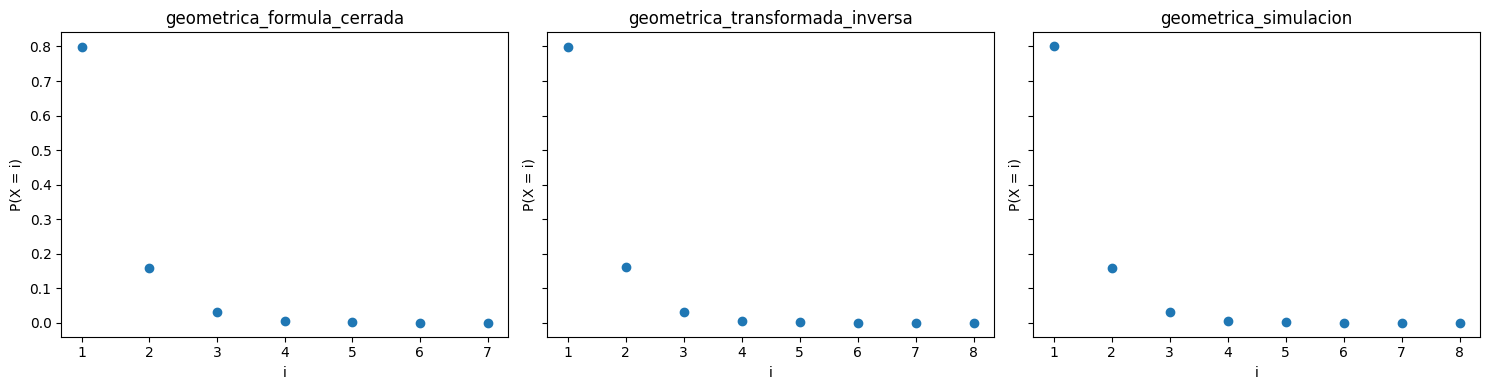

In [86]:
import matplotlib.pyplot as plt

def generar_graficos_comparativos(metodos, p, N):
    fig, axes = plt.subplots(1, len(metodos), figsize=(5 * len(metodos), 4), sharey=True)

    if len(metodos) == 1:
        axes = [axes]

    for ax, metodo in zip(axes, metodos):
        valores_generados = [metodo(p) for _ in range(N)]
        probabilidades = [valores_generados.count(i) / N for i in range(1, max(valores_generados) + 1)]

        ax.scatter(range(1, len(probabilidades) + 1), probabilidades)
        ax.set_title(f'{metodo.__name__}')
        ax.set_xlabel('i')
        ax.set_ylabel('P(X = i)')

    plt.tight_layout()
    plt.show()


generar_graficos_comparativos(
    [geometrica_formula_cerrada,
     geometrica_transformada_inversa,
     geometrica_simulacion],
    p=0.8,
    N=100_000
)


### Comparación

Compare la eficiencia de estos algoritmos para `p = 0,8` y para `p = 0,2`.

Para cada caso, realice `10000` simulaciones y calcule el promedio de los valores obtenidos. Comparar estos
valores con el valor esperado de la distribución correspondiente. Si están alejados, revisar el código.

In [87]:
import pandas as pd
from time import time

def estadisticas(metodo, p, N=10000):
    inicio = time()
    valores = [metodo(p) for _ in range(N)]
    fin = time()

    tiempo_total = fin - inicio
    promedio = sum(valores) / N

    return tiempo_total, promedio


valores_p = [0.8, 0.2]
metodos = [geometrica_formula_cerrada,
           geometrica_transformada_inversa,
           geometrica_simulacion]

tablas_por_p = {}

for p in valores_p:
    filas = []
    for metodo in metodos:
        tiempo_total, promedio = estadisticas(metodo, p)
        filas.append({
            "Método": metodo.__name__,
            "Promedio": promedio,
            "Tiempo Total (s)": tiempo_total
        })

    filas.append({
        "Método": "calculo_exacto",
        "Promedio": 1 / p,
        "Tiempo Total (s)": "-"
    })
    tablas_por_p[p] = pd.DataFrame(filas).round(4)

for p, tabla in tablas_por_p.items():
    print(f"\n ------------------ Tabla para p = {p}:  ------------------ ")
    print(tabla.to_string(index=False))



 ------------------ Tabla para p = 0.8:  ------------------ 
                         Método  Promedio Tiempo Total (s)
     geometrica_formula_cerrada    1.2454         0.006566
geometrica_transformada_inversa    1.2537         0.002537
          geometrica_simulacion    1.2637         0.001762
                 calculo_exacto    1.2500                -

 ------------------ Tabla para p = 0.2:  ------------------ 
                         Método  Promedio Tiempo Total (s)
     geometrica_formula_cerrada    4.9652         0.005335
geometrica_transformada_inversa    4.9287          0.00512
          geometrica_simulacion    5.0039         0.004135
                 calculo_exacto    5.0000                -


## Ejercicio 10

### (a) Método para generar una variable aleatoria X

Desarrolle un método para generar una variable aleatoria X cuya distribución de probabilidad está dada por:

$$
P(X = j) = (\frac{1}{2})^{j+1} +
\frac
{
  (\frac{1}{2})⋅{2^{j-1}}
}
{
  3^j
}
, \quad j = 1, 2, \dots
$$

#### Parte teorica

Podriamos usar el metodo de composición, notar que:

\begin{align}
P(X = j) & = \left(\frac{1}{2}\right)^{j+1} + \frac{\left(\frac{1}{2}\right)⋅{2^{j-1}}}{3^j} \\
& = \left(\frac{1}{2}\right)^{j+1} + \frac{{\frac{1}{2}⋅2^j⋅\frac{1}{2}}}{3^j} \\
& = \left(\frac{1}{2}\right)^{j+1} + \frac{1}{2}⋅\frac{1}{2}⋅\left(\frac{2}{3}\right)^j \\
& =\left(\frac{1}{2}\right)^{j+1} + \frac{1}{2}⋅\frac{1}{2}\left(\frac{2}{3}\right)^j \\
& = \left(\frac{1}{2}\right)^{j+1} + \frac{1}{2}⋅\frac{1}{2}\left(\frac{2}{3}\right)^j \\
& = \left(\frac{1}{2}\right)^{j+1+1-1} + \frac{1}{2}⋅\frac{1}{2}\left(\frac{2}{3}\right)^{j+1-1} \\
& = \frac{1}{2}⋅\frac{1}{2}⋅\left(\frac{1}{2}\right)^{j-1} + \frac{1}{2}⋅\frac{1}{2}⋅\frac{2}{3}⋅\left(\frac{2}{3}\right)^{j-1} \\
& = \frac{1}{2}⋅\frac{1}{2}⋅\left(\frac{1}{2}\right)^{j-1} + \frac{1}{2}⋅\frac{1}{3}⋅\left(\frac{2}{3}\right)^{j-1} \\
& = \frac{1}{2}⋅\left(\frac{1}{2}⋅\left(\frac{1}{2}\right)^{j-1}\right) + \frac{1}{2}⋅\left(\frac{1}{3}⋅\left(\frac{2}{3}\right)^{j-1}\right)\\
\end{align}

Y ahora podemos pensaralo como composicion de dos gemetricas, tal que $G_1 \backsim Geom(p=1/2)$ y $G_2 \backsim Geom(p=1/3)$

Por lo tanto tenemos que:

\begin{align}
P(X = j) = \frac{1}{2}⋅P\left(G_1 = j\right) + \frac{1}{2}⋅P\left(G_2 = j\right)
\end{align}

#### Código

In [88]:
from random import random
from numpy import log

def va_geometrica(p):
  U = random()
  return int(log(1-U)/log(1-p))+1

def composicion_X():
  U = random()
  if U <= 1/2:
    return va_geometrica(1/2)
  else:
    return va_geometrica(1/3)

In [89]:
%%timeit
composicion_X()

2.17 µs ± 75.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [90]:
from random import random

def probabilidad_masa_X(j):
  return (1/2)**(j+1) + (1/4)*(2/3)**j

def transformada_inversa_X():
  U = random()
  j = 1; F = probabilidad_masa_X(j)
  while U >= F:
    j += 1
    F += probabilidad_masa_X(j)
  return j

In [91]:
%%timeit
transformada_inversa_X()

804 ns ± 198 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


### (b) Analisis de la Esperanza

Estime E(X) con 1000 repeticiones y compare con la esperanza exacta.

#### Estimación de la esperanza

In [92]:
def estimacion_esperanza_X(metodo, N):
  valores = [metodo() for _ in range(N)]
  return sum(valores) / N

N = 1000
print(f"Esperanza estimada con N=1000 y composición: {estimacion_esperanza_X(composicion_X, N)}")
print(f"Esperanza estimada con N=1000 y transformada inversa: {estimacion_esperanza_X(transformada_inversa_X, N)}")

Esperanza estimada con N=1000 y composición: 2.623
Esperanza estimada con N=1000 y transformada inversa: 2.505


#### Valor exacto de la esperanza


Voy a usar que $X_1 \backsim Geom(p=1/2)$ y $X_2 \backsim Geom(p=1/3)$

\begin{align}
E[X] & = \sum_{j=1}^{\infty} j \cdot P(X = j) \\
& = \sum_{j=1}^{\infty} j \cdot \left(\left(\frac{1}{2}\right)^{j+1} + \frac{1}{4}⋅\left(\frac{2}{3}\right)^j\right) \\
& = \sum_{j=1}^{\infty} j \cdot \frac{1}{2} \cdot  \left(\frac{1}{2}\right)^j + \sum_{j=1}^{\infty} j \cdot \frac{1}{4} \cdot \frac{1}{3} \cdot 3 \cdot \left(\frac{2}{3}\right)^j \\
& = \sum_{j=1}^{\infty} j \cdot \frac{1}{2} \cdot  \left(\frac{1}{2}\right)^j + \frac{3}{4} \cdot \sum_{j=1}^{\infty} j \cdot \frac{1}{3} \cdot \left(\frac{2}{3}\right)^j \\
& = \sum_{j=1}^{\infty} j \cdot \frac{1}{2} \cdot  \left(\frac{1}{2}\right)^j \cdot \frac{1}{2} \cdot 2 + \frac{3}{4} \cdot \sum_{j=1}^{\infty} j \cdot \frac{1}{3} \cdot \left(\frac{2}{3}\right)^j \cdot \frac{2}{3} \cdot \frac{3}{2}  \\
& = \frac{1}{2} \cdot  \sum_{j=1}^{\infty} j \cdot \frac{1}{2} \cdot  \left(\frac{1}{2}\right)^{j-1}  + \frac{3}{4} \cdot \frac{2}{3} \cdot  \sum_{j=1}^{\infty} j \cdot \frac{1}{3} \cdot \left(\frac{2}{3}\right)^{j-1}  \\
& = \frac{1}{2} \cdot  \sum_{j=1}^{\infty} j \cdot \frac{1}{2} \cdot  \left(\frac{1}{2}\right)^{j-1}  + \frac{1}{2} \cdot \sum_{j=1}^{\infty} j \cdot \frac{1}{3} \cdot \left(\frac{2}{3}\right)^{j-1}  \\
& = \frac{1}{2} \cdot  E[X_1]  + \frac{1}{2} \cdot  E[X_2] \\
& = \frac{1}{2} \cdot  2 + \frac{1}{2} \cdot  3 \\
& = \frac{5}{2}  \\
& \fbox{= 2.5}
\end{align}


## Ejercicio 11
Sea $X$ una variable aleatoria cuya distribución de probabilidad es $P(X = j) = p_j$ con $j =
1,2,....$ Sea:

$$
λ_n = P(X = n | X > n-1) = \frac{p_n}{1 - \sum_{j=1}^{n-1} p_j},\ \ \ n = 1,2,…
$$

Las cantidades $λ_n$, son las tasas discretas de riesgo. Considerando a $X$ como el tiempo (discreto) de vida de algún artículo, $λ_n$ representa la probabilidad de que habiendo funcionado correctamente hasta el tiempo $n-1$, se rompa en el tiempo $n$.



### a) Demostración recursiva de $p_n$

Muestre que $p_1 = λ_1$ y que $p_n = (1-λ_1)(1-λ_2)···(1-λ_{n-1})λ_n$.

**Demostración**

Primero veamos que $p_1 = λ_1$ y  por definición de $λ_n$ sale que:

\begin{align}
λ_1 & = \frac{p_1}{1 - \sum_{j=1}^{1-1} p_j} \\
& = \frac{p_1}{1 - \sum_{j=1}^{0} p_j} \\
& = \frac{p_1}{1} \\
& \fbox{= $p_1$} \\
\end{align}

---

Ahora veamos que $p_n = (1-λ_1)(1-λ_2)···(1-λ_{n-1})λ_n$, para ello vamos a hacerlo por inducción en $p_n$.

**Caso base (facil)**:

Ver que $p_1 = λ_1$ y esto lo vimos antes.

**Caso recursivo**:

> Definimos:
  - $m(n) = \prod_{i=1}^n (1- λ_i)$
  - $s(n) = \sum_{i=1}^{n} p_i$

> Resultado utiles:
> - $$\fbox{$p_n = (1-λ_1)(1-λ_2)···(1-λ_{n-1})λ_n = m(n-1)⋅λ_n
 \ \ \ (🇭)\ \ $}$$
> - Por definición:
  \begin{align}
  λ_{n} & = \frac{p_{n}}{1 - \sum_{j=1}^{n-1} p_j} \\
  λ_{n} & = \frac{p_{n}}{1 - s(n-1)} \\
  \frac{1}{λ_{n}} & = \frac{1 - s(n-1)}{p_{n}} \\
  \frac{p_{n}}{λ_{n}} & = 1 - s(n-1) \\
  \frac{m(n-1)⋅λ_n}{λ_{n}} & = 1 - s(n-1) \\
  m(n-1) & = 1 - s(n-1) \\
  m(n-1)+ s(n-1) & = 1  \\
  \end{align}
>   $$\fbox{$s(n-1) = 1 - m(n-1)\ \ \ (🇵)\ \ $}$$
  
Veamos el caso de $p_{n+1}$ asumiendo que se cumple para $p_n$.

\begin{align}
λ_{n+1} & = \frac{p_{n+1}}{1 - \sum_{j=1}^{n+1-1} p_j} \\
& = \frac{p_{n+1}}{1 - \sum_{j=1}^{n} p_j} \\
& = \frac{p_{n+1}}{1 - s(n)} \\
\end{align}
  
entonces
  
\begin{align}
p_{n+1} & = λ_{n+1}⋅(1 - s(n)) \\
& = λ_{n+1}⋅(1 - (s(n-1) + p_n )) \\
& = λ_{n+1}⋅(1 - s(n-1) - p_n )\ \ \ \ (🇵) \\
& = λ_{n+1}⋅(1 - (1 - m(n-1)) - p_n ) \\
& = λ_{n+1}⋅(m(n-1) - p_n )\ \ \ \ (🇭) \\
& = λ_{n+1}⋅( m(n-1) - m(n-1)⋅λ_n ) \\
& = λ_{n+1}⋅m(n-1)⋅(1- λ_n )\\
& = λ_{n+1}⋅m(n)\\
& = λ_{n+1}⋅\prod_{i=1}^n (1- λ_i)\\
& = (1-λ_1)(1-λ_2)···(1-λ_{n-1})λ_{n+1}\\
\end{align}


### Método de la tasa discreta de riesgo

Es para simular variables aleatorias discretas: Se genera una sucesión de números aleatorios que termina cuando el n-ésimo número generado es menor que $λ_n$. El algoritmo puede escribirse como sigue:
```
Paso 1: X = 1
Paso 2: Generar U
Paso 3: Si U <λX, terminar.
Paso 4: X = X + 1
Paso 5: Ir al Paso 2
```

### b) Muestre que X tienen la distribución de probabilidad deseada

Muestre que los valores de X que genera este proceso tienen la distribución de probabilidad deseada.


Debemos probar que:$P(X = n) = p_n$, pero ya vimos que $p_n = (1-λ_1)(1-λ_2)···(1-λ_{n-1})λ_n$. Por lo tanto hay alcanza ver que:
$$
P(X\ genera\ n) = (1-λ_1)(1-λ_2)···(1-λ_{n-1})λ_n
$$

Ahora analicemos el algoritmo, para ello sean $U_i \backsim U(0,1)$

\begin{align}
P(X\ genera\ n) & = P(U_0 ≥ λ_0,U_1 ≥ λ_1,…,U_{n-1} ≥ λ_{n-1},U_n ≤ λ_n) \\
& = P(U_0 ≥ λ_0)⋅P(U_1 ≥ λ_1)⋅…⋅P(U_{n-1} ≥ λ_{n-1})⋅P(U_n ≤ λ_n) \\
& = (1-P(U_0 < λ_0))⋅(1-P(U_1 < λ_1))⋅…⋅(1-P(U_{n-1} < λ_{n-1}))⋅P(U_n ≤ λ_n) \\
& = (1 - λ_0)⋅(1 - λ_1)⋅…⋅(1 - λ_{n-1})⋅λ_n \\
& = p_n  
\end{align}

### c) Usar X es una variable aleatoria geométrica

Suponga que X es una variable aleatoria geométrica con parámetro `p`:
$$P(X = n) = p(1-p)^{n-1},\ n ≥ 1$$
Determine los valores de $λ_n,n ≥ 1$. Explique cómo funciona el algoritmo anterior en este caso y por qué es evidente su validez.

#### Determinar analiticamente los $λ_n$

Tratemos de determinar analiticamente los $λ_n$. Recordando que $F(n) = P(X ≤ n) = 1-(1- p)^n$

Por lo tanto:
\begin{align}
  P(X > n-1) & = 1 - P(X ≤ n-1) \\
  & = 1 - (1-(1-p)^{n-1}) \\
  & = (1-p)^{n-1} \\
\end{align}

Y ahora si:

\begin{align}
  λ_n & = P(X = n | X > n-1) \\
  & = \frac{P(X = n)⋅P(X > n-1)}{P(X > n-1)} \\
  & = \frac{P(X = n)}{P(X > n-1)} \\
  & = \frac{p(1-p)^{n-1}}{(1-p)^{n-1}} \\
  & = p \\
\end{align}

In [93]:
# Revisemos el resultado anterior:

def probabilidad_masa_geometrica(i,p):
  return (p * (1-p)**(i-1))

def lambda_asociado_a_gemetrica(i,p):
  if i == 1:
    return probabilidad_masa_geometrica(i,p)
  else:
    return probabilidad_masa_geometrica(i,p) / (1 - sum(probabilidad_masa_geometrica(j,p) for j in range(1,i)))

def lambas_asociados_geometrica(p, n):
  return [round(lambda_asociado_a_gemetrica(i,p),1) for i in range(1,n+1)]

In [94]:
lambas_asociados_geometrica(0.8, 10)

[0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8]

#### Código

In [95]:
from random import random

def geom_tasa_discreta(p):
    """
    Metodo de la tasa discreta para una variable geometrica
    """

    k = 1
    while True:
        u = random()
        if u < p:
            return k
        k += 1

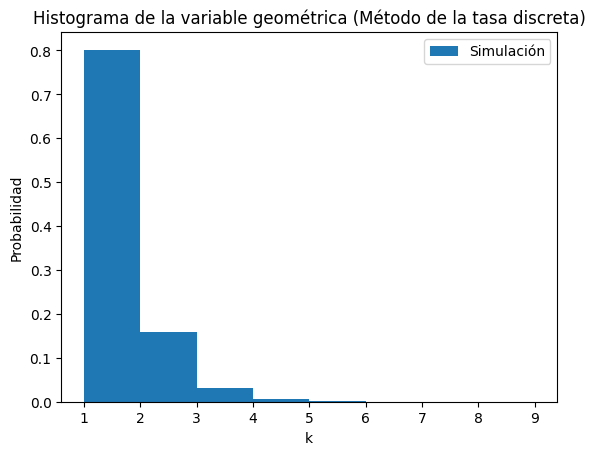

In [96]:
import matplotlib.pyplot as plt

p = 0.8
n_iteraciones = 100_000
resultados = [geom_tasa_discreta(p) for _ in range(n_iteraciones)]

# Gráfico
plt.hist(resultados, bins=range(1, max(resultados) + 2), density=True, alpha=1, label='Simulación')
plt.xlabel('k')
plt.ylabel('Probabilidad')
plt.title('Histograma de la variable geométrica (Método de la tasa discreta)')
plt.legend()
plt.show()


## Ejercicio 12

¿Qué distribución tiene la variable simulada por el siguiente algoritmo?

```python
def QueDevuelve(p1,p2):
  X = int(np.log(1-random())/np.log(1-p1))+1
  Y = int(np.log(1-random())/np.log(1-p2))+1
  return min(X,Y)
```

Escriba otro algoritmo que utilice un único número aleatorio (`random()`) y que simule una variable con
la misma distribución que la simulada por `QueDevuelve(0.05, 0.2)`.

### Analisis de la distibución


Tenemos que la distibucion de $QueDevuelve(p_1,p_2) = \min\{X, Y\}$ tal que $X\backsim Geom(p_1)$ e $Y\backsim Geom(p_2)$, llamemos $Z = \min\{X, Y\}$

Veamos esto con más detalle, por el teorico tenemos que:
\begin{align}
P(Z > z) & = (1-F_X(z))⋅(1-F_Y(z)) \\
& = (1-(1-(1- p_1)^z))⋅(1-(1-(1- p_2)^z)) \\
& = (1- p_1)^z⋅(1- p_2)^z \\
& = ((1- p_1)(1- p_2))^z \\
\end{align}

y ahora

\begin{align}
P(Z = z) & = P(Z ≥ z) - P(Z > z) \\
& = P(Z > z-1) - P(Z > z)\\
& = ((1- p_1)(1- p_2))^{z-1} - ((1- p_1)(1- p_2))^z\\
& = ((1- p_1)(1- p_2))^{z-1} \cdot (1-(1- p_1)(1- p_2))\\
\end{align}

si tomamos $p = (1- p_1)(1- p_2)$

\begin{align}
P(Z = z) & = (p)^{z-1} \cdot (1-p)\\
\end{align}

si hacemos $p' = 1-p$ entonces $p = 1-p'$ por lo tanto:

\begin{align}
P(Z = z) & = (1-p')^{z-1} \cdot (p')\\
\end{align}

Aplicando un poco de aritmetica:

\begin{align}
p & = 1-p_1-(1- p_1)(p_2) \\
& = 1-p_1-(p_2- p_1⋅p_2) \\
& = 1-p_1-p_2 + p_1⋅p_2 \\
\end{align}

por lo tanto:

\begin{align}
p' & = 1 - p \\
& = 1 - (1-p_1-p_2 + p_1⋅p_2 ) \\
& = p_1+p_2 - p_1⋅p_2  \\
\end{align}

De aca conculimos que:
$$
Z \backsim Geom(p_1 + p_2 - p_1⋅p_2 )
$$



In [97]:
import numpy as np
from random import random

def variable_aleatoria_Z(p1,p2):
  p = p1 + p2 - p1*p2
  return int(np.log(1-random())/np.log(1-p))+1

In [98]:
%%timeit
variable_aleatoria_Z(0.05,0.02)

2.59 µs ± 337 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [99]:
import numpy as np
from random import random

def QueDevuelve(p1,p2):
  X = int(np.log(1-random())/np.log(1-p1))+1
  Y = int(np.log(1-random())/np.log(1-p2))+1
  return min(X,Y)

In [100]:
%%timeit
QueDevuelve(0.05,0.2)

7.33 µs ± 2.71 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Comparación

In [101]:
import numpy as np

n_valores = 1_000_000
p1 = 0.05
p2 = 0.2

valores_que_devuelve = [QueDevuelve(p1, p2) for _ in range(n_valores)]
valores_variable_aleatoria_z = [variable_aleatoria_Z(p1, p2) for _ in range(n_valores)]

probabilidades_que_devuelve = [0 for _ in range(0, max(valores_que_devuelve)+1)]
probabilidades_variable_aleatoria_z = [0 for _ in range(0, max(valores_variable_aleatoria_z)+1)]

for valor in valores_que_devuelve:
  probabilidades_que_devuelve[valor] += 1

for valor in valores_variable_aleatoria_z:
  probabilidades_variable_aleatoria_z[valor] += 1

probabilidades_que_devuelve = [probabilidad / n_valores for probabilidad in probabilidades_que_devuelve]
probabilidades_variable_aleatoria_z = [probabilidad / n_valores for probabilidad in probabilidades_variable_aleatoria_z]

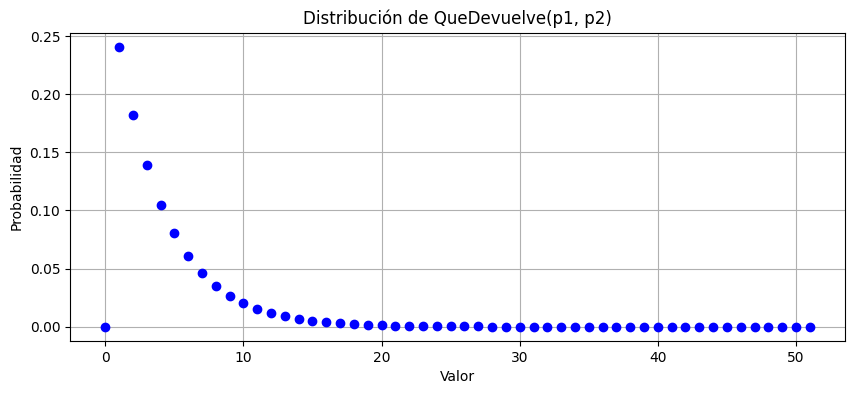

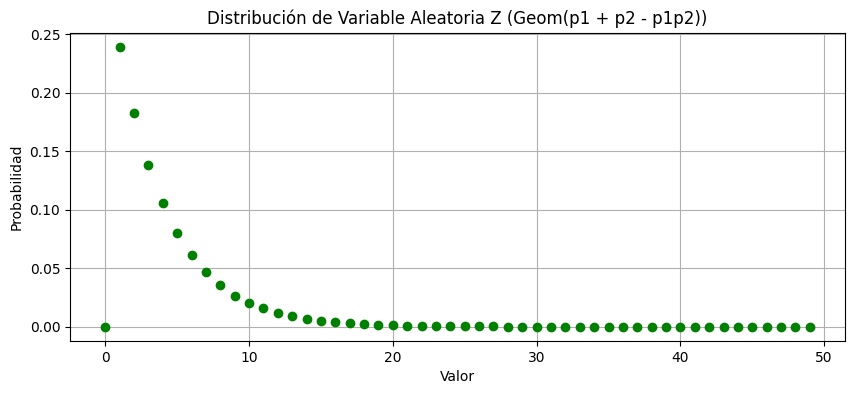

In [102]:
import matplotlib.pyplot as plt
import numpy as np

x1 = np.arange(len(probabilidades_que_devuelve))
x2 = np.arange(len(probabilidades_variable_aleatoria_z))

# Primer gráfico: QueDevuelve
plt.figure(figsize=(10, 4))
plt.plot(x1, probabilidades_que_devuelve, 'o', color='blue')
plt.title('Distribución de QueDevuelve(p1, p2)')
plt.xlabel('Valor')
plt.ylabel('Probabilidad')
plt.grid(True)
plt.show()

# Segundo gráfico: Variable Aleatoria Z
plt.figure(figsize=(10, 4))
plt.plot(x2, probabilidades_variable_aleatoria_z, 'o', color='green')
plt.title('Distribución de Variable Aleatoria Z (Geom(p1 + p2 - p1p2))')
plt.xlabel('Valor')
plt.ylabel('Probabilidad')
plt.grid(True)
plt.show()